# THIS IS THE FINAL NOTEBOOK THAT MAKES ALL PLOTS USED IN THE PAPER --> data are stored on Vollmond

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 
import os 
# from tqdm import tqdm
import pandas as pd
# import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from statistics import mode
# import ipyparams # only in notebook, not in jupyter lab

In [25]:
save_plot = True

plot_dir = 'plots/FINAL/'
os.system('mkdir -p {}'.format(plot_dir))

0

## Deflection per interaction plot

## Attwood data comparison 

In [5]:
# Read PROPOSAL data
data_dir = 'data/attwood/'
key_0 = 'E199_moliere_v_cut0.001'
df_0 = pd.read_hdf(data_dir + 'sim_data.hdf5', key=key_0)
key_5 = 'E199_moliere_v_cut1e-05'
df_5 = pd.read_hdf(data_dir + 'sim_data.hdf5', key=key_5)

# read in unfoled data of Attwood, angle in rad and probability in percent
Attwood = pd.read_csv('data/attwood/Attwood_unfolded_data.csv', sep=';', decimal=',', names=['angle', 'probability']) 
print('total probability attwood: ', np.sum(Attwood.probability))
GEANT4 = pd.read_csv('data/attwood/Attwood_GEANT4.csv', sep=';', decimal=',', names=['angle', 'probability']) 

total probability attwood:  151.87151660028977


moliere, E = 199 MeV


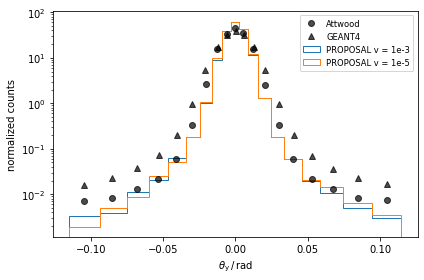

In [26]:
# Set binning
binning = [Attwood.angle[i] - abs(Attwood.angle[i+1] - Attwood.angle[i])/2 for i in range(len(Attwood)-1)]
binning.append(Attwood.angle.values[-1] - abs(Attwood.angle.values[-1] - Attwood.angle.values[-2])/2)
binning.append(Attwood.angle.values[-1] + abs(Attwood.angle.values[-1] - Attwood.angle.values[-2])/2)

# plot y direction
plt.plot(Attwood.angle, Attwood.probability, 'o', color='black', alpha=0.7, label='Attwood')
plt.plot(GEANT4.angle, GEANT4.probability, '^', color='black', alpha=0.7, label='GEANT4')

bins = binning
plt.hist(df_0.tracks_109_y, bins=bins, histtype='step', density=True, label='PROPOSAL v = 1e-3')
plt.hist(df_5.tracks_109_y, bins=bins, histtype='step', density=True, label='PROPOSAL v = 1e-5')

plt.ylabel('normalized counts')
# plt.xlabel('y angle in rad')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$rad')
plt.yscale('log')
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
if save_plot:    
    plt.savefig(plot_dir + 'attwood_comparison_moliere_E199MeV_final.pdf', bbox_inches='tight')
print('moliere, E = 199 MeV')

## GEANT4 and MUSIC comparison

In [53]:
# Read data
df_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final.hdf5')
df_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_highland.hdf5')
df_GEANT4_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4.hdf5')
df_GEANT4_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4_highland.hdf5')
df_MUSIC = pd.read_csv('data/compare_MUSIC/MUSIC_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4 = pd.read_csv('data/compare_MUSIC/Geant4_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4_angle = pd.read_csv('data/compare_MUSIC/GEANT4_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')
df_MUSIC_angle = pd.read_csv('data/compare_MUSIC/MUSIC_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')

In [66]:
E_i = df_moliere.E_i[0] * 1e3 # in MeV
E_f = mode(df_moliere.E_f) * 1e3 # in MeV 
n_events = len(df_moliere)
n_events

1000000

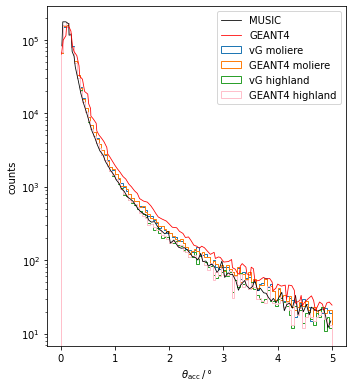

In [68]:
# Deflection

plt.figure(figsize=(5, 5.5))

bins = np.linspace(0, 5, 101)
plt.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='GEANT4 highland')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.ylabel('counts')


plt.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_only3km_5deg_paper.pdf'.format('2TeV', '1e6'))

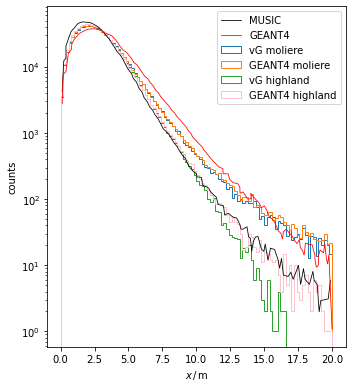

In [69]:
# Distance to shower axis 

plt.figure(figsize=(5, 5.5))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.linspace(0, 20, 101)
plt.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG moliere')
plt.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='GEANT4 moliere')
plt.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG highland')
plt.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step', label='GEANT4 highland')

plt.yscale('log')
plt.xlabel(r'$x\,/\,$m') 
plt.ylabel('counts')


plt.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

plt.legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_distance_showeraxis_only3km_20m_paper.pdf'.format('2TeV', '1e6'))

In [62]:
# survival probability with E_f = 10 MeV (muon mass)
surv_proposal_moliere = np.round(len(df_moliere[df_moliere.distances==3e3]) / len(df_moliere), 3)
surv_proposal_highland = np.round(len(df_highland[df_highland.distances==3e3]) / len(df_highland), 3)
surv_music = 0.779
surv_geant4 = 0.793
print('--- survival probability:')
print('proposal moliere: ', surv_proposal_moliere)
print('proposal highland: ', surv_proposal_highland)
print('music: ', surv_music)
print('geant4: ', surv_geant4)

# mean scattered angle in degree
mean_angle_proposal_moliere = np.round(np.mean(df_moliere.deflection[df_moliere.distances==3e3]), 2)
mean_angle_proposal_GEANT4_moliere = np.round(np.mean(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2)
mean_angle_proposal_highland = np.round(np.mean(df_highland.deflection[df_highland.distances==3e3]), 2)
mean_angle_proposal_GEANT4_highland = np.round(np.mean(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2)
mean_angle_music = 0.22 
mean_angle_geant4 = 0.27
print('\n--- mean scattered angel in degree:')
print('proposal vG moliere: ', mean_angle_proposal_moliere, ' ± ', np.round(np.std(df_moliere.deflection[df_moliere.distances==3e3]), 2))
print('proposal GEANT4 moliere: ', mean_angle_proposal_GEANT4_moliere, ' ± ', np.round(np.std(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2))
print('proposal vG highland: ', mean_angle_proposal_highland, ' ± ', np.round(np.std(df_highland.deflection[df_highland.distances==3e3]), 2))
print('proposal GEANT4 highland: ', mean_angle_proposal_GEANT4_highland, ' ± ', np.round(np.std(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2))
print('music: ', mean_angle_music)
print('geant4: ', mean_angle_geant4)

# mean survived energy in GeV
mean_energy_proposal_moliere = np.round(np.mean(df_moliere.E_f[df_moliere.distances==3e3]), 0)
mean_energy_proposal_highland = np.round(np.mean(df_highland.E_f[df_highland.distances==3e3]), 0)
mean_energy_music = 323 
mean_energy_geant4 = 317
print('\n--- mean survived energy in GeV:')
print('proposal moliere: ', mean_energy_proposal_moliere, ' ± ', np.round(np.std(df_moliere.E_f[df_moliere.distances==3e3]), 0))
print('proposal highland: ', mean_energy_proposal_highland, ' ± ', np.round(np.std(df_highland.E_f[df_highland.distances==3e3]), 0))
print('music: ', mean_energy_music)
print('geant4: ', mean_energy_geant4)

# mean shower axis distance in meter
mean_dist_proposal_moliere = np.round(np.mean(d_shower_moliere[df_moliere.distances==3e3]), 1)
mean_dist_proposal_GEANT4_moliere = np.round(np.mean(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1)
mean_dist_proposal_highland = np.round(np.mean(d_shower_highland[df_highland.distances==3e3]), 1)
mean_dist_proposal_GEANT4_highland = np.round(np.mean(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1)
mean_dist_music = 2.6
mean_dist_geant4 = 3.3
print('\n--- mean distance to shower axis in meter:')
print('proposal vG moliere: ', mean_dist_proposal_moliere, ' ± ', np.round(np.std(d_shower_moliere[df_moliere.distances==3e3]), 1))
print('proposal GEANT4 moliere: ', mean_dist_proposal_GEANT4_moliere, ' ± ', np.round(np.std(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1))
print('proposal vG highland: ', mean_dist_proposal_highland, ' ± ', np.round(np.std(d_shower_highland[df_highland.distances==3e3]), 1))
print('proposal GEANT4 highland: ', mean_dist_proposal_GEANT4_highland, ' ± ', np.round(np.std(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1))
print('music: ', mean_dist_music)
print('geant4: ', mean_dist_geant4)

--- survival probability:
proposal moliere:  0.779
proposal highland:  0.779
music:  0.779
geant4:  0.793

--- mean scattered angel in degree:
proposal vG moliere:  0.24  ±  0.45
proposal GEANT4 moliere:  0.24  ±  0.45
proposal vG highland:  0.22  ±  0.35
proposal GEANT4 highland:  0.22  ±  0.35
music:  0.22
geant4:  0.27

--- mean survived energy in GeV:
proposal moliere:  331.0  ±  178.0
proposal highland:  331.0  ±  178.0
music:  323
geant4:  317

--- mean distance to shower axis in meter:
proposal vG moliere:  2.9  ±  2.6
proposal GEANT4 moliere:  2.9  ±  2.6
proposal vG highland:  2.7  ±  1.6
proposal GEANT4 highland:  2.7  ±  1.7
music:  2.6
geant4:  3.3


## Accumulated deflection fit

In [23]:
# Read data E_i = 10 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)

# Read data E_i = 1 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
print(df_dict.keys())
E_f = sorted(E_f_unsorted)

# Read data E_i = 100 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)

# Read data E_i = 10 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df 
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)

dict_keys(['df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05', 'df_11', 'df_12'])
dict_keys(['df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05'])
dict_keys(['df_08', 'df_07', 'df_03', 'df_06', 'df_02', 'df_05', 'df_01', 'df_04'])
dict_keys(['df_06', 'df_05', 'df_02', 'df_04', 'df_01', 'df_03'])


In [24]:
# 10% cut of E_min

mi = 0.9

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TabNine::eV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

df_10 10000000.0 10.0 55000 53579 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 50969 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 51418 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 50406 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 51536 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 51362 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 50512 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 78654 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 50343 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 49829 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 50605 0.0007157894736842105 0.5326842105263158 1877.0
df_12 10000000.0 5000000.0 95000 55076 0.00016842105263157895 0.5797473684210527 1725.0
df_10 1000000.0

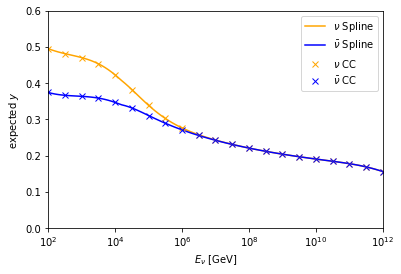

In [27]:
# Neutrino Review Paper Fig. 10
df_y = pd.read_hdf('data/y_data.hdf5')
# y: energy transfer to nucleus --> (1-y) energy transfer to muon, E_mu = (1-y) * E_nu
spl_nu = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')

spl_nu_bar = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_bar_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')


plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_simps[::5], 'x', color='orange', label=r'$\nu \ \mathrm{CC}$')
plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_bar_simps[::5], 'x', color='blue', label=r'$\bar{\nu} \ \mathrm{CC}$')
plt.xscale('log')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'expected $y$')
plt.ylim(0., 0.6)
plt.xlim(1e2, 1e12)
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'expected_y.pdf')

poly params:  [ 0.02407291 -0.31206222  0.37943753 -0.21557717] , errors:  [0.00138644 0.01616002 0.05660823 0.05764848]


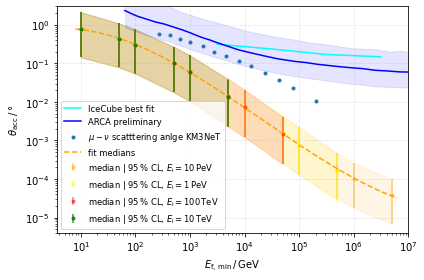

In [36]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

# E_i = 10 PeV
plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')

###### comparison to current neutrino telescopes ##########  
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')

# kinematic angle read from KM3NeT
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu - \nu$ scatttering anlge KM3NeT')

# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final.pdf')

In [42]:
# print median values for E_i = 1 PeV with lower and upper 95% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_1P_cut_10[i], d+deflection_median_upper_1P_cut_10[i]))

E_f = 10.0 GeV, med(d) = 0.7927173824614776 ° - 0.14822654637611676 ° + 2.116198333192273 °
E_f = 50.0 GeV, med(d) = 0.4213334170461231 ° - 0.07826099674373155 ° + 1.0880708732549256 °
E_f = 100.0 GeV, med(d) = 0.2920281231686144 ° - 0.05398354710803954 ° + 0.7536732401335691 °
E_f = 500.0 GeV, med(d) = 0.10172736431524004 ° - 0.017849736296515543 ° + 0.2685311285118863 °
E_f = 1000.0 GeV, med(d) = 0.059217068634979365 ° - 0.010011276516561314 ° + 0.1603757158408989 °
E_f = 5000.0 GeV, med(d) = 0.014164233999297645 ° - 0.002331446767644303 ° + 0.03930746288820953 °
E_f = 10000.0 GeV, med(d) = 0.0073551899251443785 ° - 0.0012201716229512573 ° + 0.020602378167500785 °
E_f = 50000.0 GeV, med(d) = 0.0015315073912256488 ° - 0.0002586989090174757 ° + 0.004306584856400331 °
E_f = 100000.0 GeV, med(d) = 0.0007899436563681644 ° - 0.00013118708552447257 ° + 0.0022013100150495143 °
E_f = 500000.0 GeV, med(d) = 0.0001583629292163158 ° - 2.593631638505576e-05 ° + 0.00043480475567464884 °


median dist:  17521.549791812235
low dist 95%:  8039.545665632053
high dist 95%:  26518.59826374591


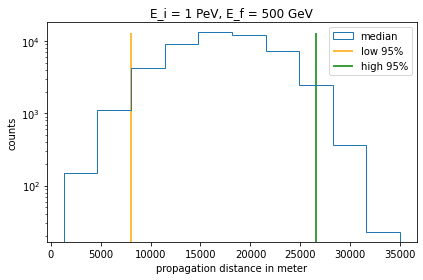

In [40]:
# Get distances for E_i = 1 PeV to E_f = 500 GeV (for abstract info)

mi = 0.9
median_dist_1_500 = np.median(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500])
print('median dist: ', median_dist_1_500)
low_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.025)
print('low dist 95%: ', low_dist_1_500)
high_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.975) # - median_dist_1_500
print('high dist 95%: ', high_dist_1_500)

plt.hist(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], histtype='step', label='median')
plt.vlines(low_dist_1_500, 0, 13e3, color='orange', label='low 95%')
plt.vlines(high_dist_1_500, 0, 13e3, color='green', label='high 95%')
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')
plt.legend()
plt.title('E_i = 1 PeV, E_f = 500 GeV')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'distance_1PeV_500GeV.pdf')

In [49]:
# Check deviation between water and ice simulation ---> less than 1% deviation
deflection_median_10P_cut_10_water = np.array([
                     0.79150338217522568093,
                     0.42027063875051527748,
                     0.2932342756713901575,
                     0.1012175759191841121,
                     0.059028678121102240653,
                     0.014155812831099963241,
                     0.0073208573158286867227,
                     0.0015401160779994301778,
                     0.00077872394269746531866,
                     0.00017512560410630505606,
                     0.000100290243100752244415,
                     3.8162822474097349672e-05])
water_ice_deviation = (deflection_median_10P_cut_10 - deflection_median_10P_cut_10_water) / deflection_median_10P_cut_10 * 100 # values in percent
water_ice_deviation

array([-0.40087482, -0.19993   ,  0.47171264,  0.68293802, -0.09817561,
       -0.4024428 ,  0.13951024, -0.63143214,  0.10429377, -0.07257024,
        0.40159722, -0.12536046], dtype=float128)